# Ejercicio con kNNs

Primero, descargamos un dataset sobre el que vamos a trabajar en nuestro ejercicio en un subdirectorio `data` de nuestro directorio de trabajo:

In [1]:
!curl -o data/diabetes.csv https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
#Esto se puede hacer desde shell también, lo guarda en un directorio y archivo

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23873  100 23873    0     0   264k      0 --:--:-- --:--:-- --:--:--  264k


A continuación, cargamos los módulos que utilizaremos en el ejercicio:

In [2]:
# Nuestros sospechosos habituales
import pandas as pd
import numpy as np

# También, como siempre, nos apoyamos en Scikit-Learn para hacer el split en training y test
from sklearn.model_selection import train_test_split

# Usaremos el preprocesador StandardScaler para no tener sesgos en los datos de entrada
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Importamos herramientas para evaluar el modelo. F1 es la media armónica de precision y recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

Ahora es el turno de cargar el dataset en un Pandas dataframe y de investigar un poco qué es lo que tenemos en términos de número de muestras y de features. Apoyaos en la documentación pública de Pandas para investigar cómo cargar un dataset (lo veremos en clase de todas formas). Escribid el código en los placeholders marcados con `#tu código aquí#`:

In [4]:
# Leemos el CSV que hemos descargado con la ayuda de los métos que nos ofrecen los dataframes de Pandas
dataset = pd.read_csv('data/diabetes.csv', header=[0])
    
# Vemos cuántas muestras tiene nuestro dataset
print(dataset.shape)

# Miramos también qué pinta tiene el dataset desde el punto de vista de
# características y etiquetas, usando las capacidades de nuevo de los dataframes de Pandas
dataset.head(5)



(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Trata de investigar si hay columnas del dataset que contienen valores que son nulos y que no tienen sentido. Como ejemplo, un grosor de piel de valor cero no tiene mucho sentido:

In [5]:
#Preguntamos si hay valores nulos y parece que está limpio en eso
dataset.isnull().values.any() #Nos dice que no
dataset.isnull().any() #En qué columnas hay valores NaN

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
#Ahora vamos con los valores nulos
dataset.describe() #miramos datos en general, parece que hay muchos mínimos 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Escribe código para filtrar los valores nulos de 1 columna del DataFrame y visualizarlos,
# deberías poder hacerlo en 1 línea
print(dataset[dataset['SkinThickness'] > 0].count())
print(dataset[dataset['BloodPressure'] == 0].count())


Pregnancies                 541
Glucose                     541
BloodPressure               541
SkinThickness               541
Insulin                     541
BMI                         541
DiabetesPedigreeFunction    541
Age                         541
Outcome                     541
dtype: int64
Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64


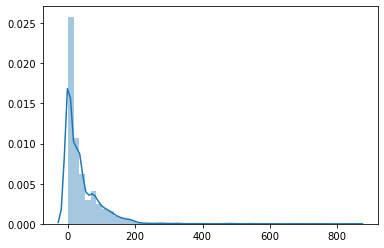

In [11]:
#Probando las gráficas
import seaborn as sb
sb.distplot(dataset)



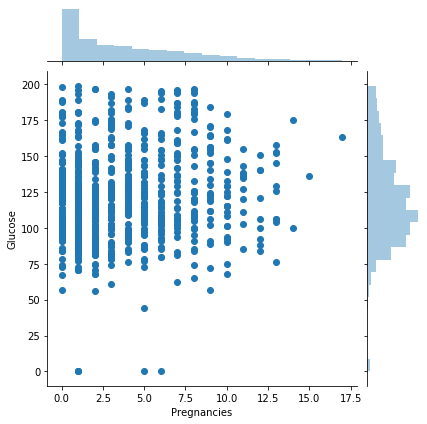

In [12]:
sb.jointplot(x="Pregnancies", y="Glucose", data=dataset)

{'whiskers': [<matplotlib.lines.Line2D at 0x136e5af10>,
 'caps': [<matplotlib.lines.Line2D at 0x136e5fa10>,
 'boxes': [<matplotlib.lines.Line2D at 0x136e5a290>,
 'medians': [<matplotlib.lines.Line2D at 0x136d275d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x136e67990>,
 'means': []}

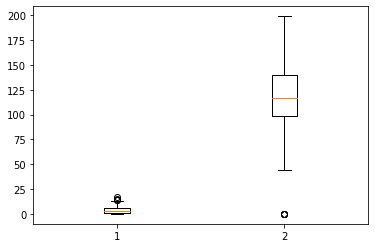

In [13]:
# Probando con boxplots...
import matplotlib.pyplot as plt
boxplot1 = dataset['Pregnancies']
boxplot2 = dataset['Glucose']
plt.boxplot ([boxplot1, boxplot2])

Ahora, para la columna correspondiente a la feature que has elegido explorar (por ejemplo, skinThickness), calcula la media de los valores:

In [14]:
# Calcula la media de los valores de 1 columna de tu DataFrame
mean = np.mean(dataset['SkinThickness'])
type(mean)

numpy.float64

Lo que vamos a hacer ahora es sustituir los valores nulos por la media de todos los valores de la columna, con el objetivo de poder seguir contando con las muestras que los tienen. Como pista, debes hacer esa operación para todas estas columnas en el DataFrame: 'Glucose','BloodPressure','SkinThickness','BMI','Insulin'. Lo mejor es que escribas código que itere sobre esas columnas para realizar la operación:

In [15]:
# Almacena las columnas a alterar en una lista de Python                             
dataset_alt = dataset.loc[:, ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']]
dataset_alt.columns
dataset_alt.shape

(768, 5)

In [16]:
dataset_prueba = dataset_alt.iloc[0:50]
dataset_prueba

,Glucose,BloodPressure,SkinThickness,BMI,Insulin
0,148,72,35,33.6,0
1,85,66,29,26.6,0
2,183,64,0,23.3,0
3,89,66,23,28.1,94
4,137,40,35,43.1,168
5,116,74,0,25.6,0
6,78,50,32,31.0,88
7,115,0,0,35.3,0
8,197,70,45,30.5,543
9,125,96,0,0.0,0


In [17]:
####Pruebas 
for column, contenido in dataset_prueba.items():
    mean = np.mean(contenido)
    contenido = contenido.replace(0, mean)
    print(column, mean)
dataset_prueba[1:16]


Glucose 127.38
BloodPressure 69.18
SkinThickness 19.06
BMI 31.257999999999996
Insulin 81.54


,Glucose,BloodPressure,SkinThickness,BMI,Insulin
1,85,66,29,26.6,0
2,183,64,0,23.3,0
3,89,66,23,28.1,94
4,137,40,35,43.1,168
5,116,74,0,25.6,0
6,78,50,32,31.0,88
7,115,0,0,35.3,0
8,197,70,45,30.5,543
9,125,96,0,0.0,0
10,110,92,0,37.6,0


In [18]:
#### Código de Lurdes
columns = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for col in columns:
    m= dataset_prueba[col].mean()
    print(m)
    dataset_prueba[col] = dataset_prueba[col].replace(0, m)
dataset_prueba[1:16]

127.38
69.18
19.06
31.257999999999996
81.54


/Users/victormac/anaconda3/envs/ks-sl/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/victormac/anaconda3/envs/ks-sl/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/victormac/anaconda3/envs/ks-sl/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Glucose,BloodPressure,SkinThickness,BMI,Insulin
1,85,66.00,29.00,26.600,81.54
2,183,64.00,19.06,23.300,81.54
3,89,66.00,23.00,28.100,94.00
4,137,40.00,35.00,43.100,168.00
5,116,74.00,19.06,25.600,81.54
6,78,50.00,32.00,31.000,88.00
7,115,69.18,19.06,35.300,81.54
8,197,70.00,45.00,30.500,543.00
9,125,96.00,19.06,31.258,81.54
10,110,92.00,19.06,37.600,81.54


In [8]:
#FORMA LARGA: Itera sobre cada elemento de la lista, calculando la media
# y posteriormente sustituyendo los ceros por el valor calculado de la media
dataset_final = dataset.copy()
mean_skin = np.mean(dataset_final['SkinThickness'])
mean_glucose = np.mean(dataset_final['Glucose'])
mean_blood = np.mean(dataset_final['BloodPressure'])
mean_bmi = np.mean(dataset_final['BMI'])
mean_insulin = np.mean(dataset_final['Insulin'])

dataset_final['Insulin'] = dataset_final['Insulin'].replace (0, mean_insulin)
dataset_final['BMI'] = dataset_final['BMI'].replace (0, mean_bmi)
dataset_final['BloodPressure'] = dataset_final['BloodPressure'].replace (0, mean_blood)
dataset_final['Glucose'] = dataset_final['Glucose'].replace (0, mean_glucose)
dataset_final['SkinThickness'] = dataset_final['SkinThickness'].replace (0, mean_skin)

print(dataset_final[dataset_final['BMI'] == 0].count())
dataset_final.shape
dataset_final.columns

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Antes de comenzar con el proceso de entrenamiento, como siempre, partimos el dataset en training y test. Elige un 20% del dataset para el conjunto de testing, dejando el 80% restante para el entrenamiento:

In [9]:
# Recuerda que la columna nueve (índice 8) es la que tiene
# nuestras etiquetas, y que el resto contiene las features.
dataset_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

X = dataset_final[dataset_features]
y = dataset_final.Outcome
# Haz el split, selecciona un 20% del dataset original como datos de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [10]:
print(X_train.shape)
print(X_test.shape)
X_test.shape[0] + X_train.shape[0]


(614, 8)
(154, 8)


768

Lo siguiente será escalar los datos, ésta es una técnica de ingeniería de características que será necesaria para poder calcular distancias correctamente con KNNs (veremos más sobre esto en clase):

In [11]:
# Ahora escalamos los datos, de manera que todos los rangos van desde -1 hasta 1.
sc_X = StandardScaler()
# Hacemos training y transformación conjunta sobre el training set
X_train = sc_X.fit_transform(X_train)
# Tenemos que asegurarnos de que el testing set también está transformado
X_test = sc_X.transform(X_test)

Una buena estimación del número de vecinos suele ser la raíz cuadrada del número de características. Usa este número como tu configuración inicial de `n_neighbors` y procede crear y entrenar un kNN:

In [12]:
import math
#Hacemos la raiz cuadrada de 8
print(math.sqrt(8))
math.sqrt(len(y_test)) # Así vemos el número de vecinos que usar

2.8284271247461903


12.409673645990857

In [18]:
# Define el modelo, inicializando kNN con los datos seleccionados
cls = KNeighborsClassifier(n_neighbors=3)
# Entrena el modelo
cls.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Finalmente, evalua el modelo sobre el dataset de test, y muestra la precisión obtenida:

In [19]:
print("Predicciones sobre el juego de pruebas:", cls.predict(X_test))
print("Precisión sobre el juego de pruebas: {:.2f}".format(cls.score(X_test, y_test)))

Predicciones sobre el juego de pruebas: [1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0]
Precisión sobre el juego de pruebas: 0.77


In [20]:
X_test[:1]

array([[-0.8354355 ,  2.55688505,  0.29184926,  1.67888712, -0.42519351,
         1.47038609,  2.78594417, -0.96569189]])